# Red de empresas - Patrones adjudicación
__Queletzú Paulina Aspra Polo y Mariana Esther Martínez Sánchez__

1. Limpieza por sexenio
* Colaboraciones en contratos
* __Patrones adjudicación__


* ¿Cuántos contratos y de que monto se dieron por cada tipo de adjudicación?
    * Sexenio y Año
    * Absoluto y normalizado
* ¿Cuántas empresas contrata cada institucion? dist
* ¿Qué monto asigna por tipo de contrato cada institucion? barra
* ¿Para cuántas instituciones trabaja una empresa? dist
* ¿Qué monto recibe por tipo de adjudicación una empresa? barra
* ¿Qué empresas reciben un solo gran contrato? barra
* Lista puede con todas
* Lista favoritas
* ¿Son las mismas empresas populares a lo largo del tiempo? Venn
    * Todas
    * Puede con todas
    * Las favoritas


## Cargar datos

In [1]:
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
import matplotlib_venn
import seaborn as sns

In [2]:
sexenios = ['FOX','CAL','EPN']
colors_sex = {'FOX':'red','CAL':'green','EPN':'blue'}
colors_met = {'direct':'#e7298a','limited':'#a6761d','open':'#8da0cb'}

In [3]:
data = {}
for pres in sexenios:
    print(pres)
    data[pres] = {}
    data[pres]['contratos'] = pd.read_csv('data-clean/{}-contratos.csv'.format(pres))
    print('\tcontratos', data[pres]['contratos'].shape)
    data[pres]['red'] = pd.read_csv('data-clean/{}-red.csv'.format(pres))
    print('\tred', data[pres]['red'].shape)

FOX
	contratos (138462, 12)
	red (74557, 13)
CAL
	contratos (549162, 12)
	red (122254, 13)
EPN
	contratos (452369, 12)
	red (172559, 13)


## ¿Cuántos contratos y de que monto se dieron por cada tipo de adjudicación?

* Sexenio y Año
* Absoluto y normalizado

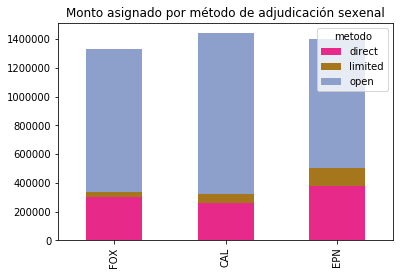

In [4]:
df = [data[pres]['contratos'].groupby(['metodo']).agg({'monto':'sum'}) \
      .rename(columns={'monto':pres}) for pres in sexenios]

df = pd.concat(df, sort=False, axis=1)
df.transpose().plot.bar(stacked=True, color=[colors_met[c] for c in df.index],
                        title="Monto asignado por método de adjudicación sexenal")
plt.show()

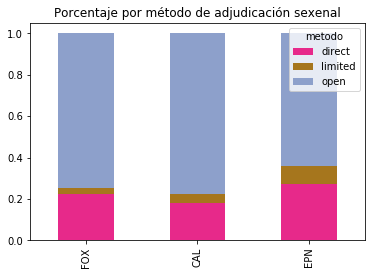

In [5]:
df = df.divide(df.sum(), axis=1)
df.transpose().plot.bar(stacked=True, color=[colors_met[c] for c in df.index], 
                        title="Porcentaje por método de adjudicación sexenal")
plt.show()

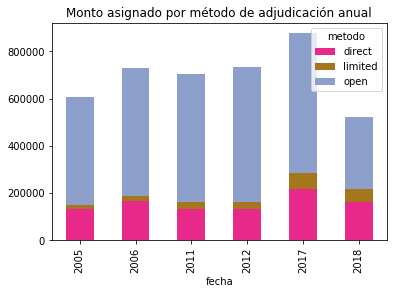

In [6]:
df = [pd.pivot_table(data[pres]['contratos'], values='monto', index=['metodo'], columns=['fecha'], aggfunc='sum') \
      .rename(columns={'monto':pres}) for pres in sexenios]

df = pd.concat(df, sort=False, axis=1)
df.transpose().plot.bar(stacked=True, color=[colors_met[c] for c in df.index],
                        title="Monto asignado por método de adjudicación anual")
plt.show()

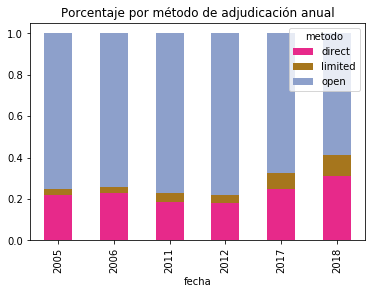

In [7]:
df = df.divide(df.sum(), axis=1)
df.transpose().plot.bar(stacked=True, color=[colors_met[c] for c in df.index], 
                        title="Porcentaje por método de adjudicación anual")
plt.show()

## ¿Qué monto asigna por tipo de contrato cada institucion?

In [25]:
inst = {key:data[key]['contratos'] \
                .groupby('nombre').agg({'monto':'sum','directa':'sum','invtres':'sum','abierta':'sum'}) \
                .sort_values('monto', ascending=False)
        for key in sexenios}
print([ [key,df.shape[0]] for key, df in inst.items() ])

[['FOX', 2660], ['CAL', 4295], ['EPN', 4470]]


FOX


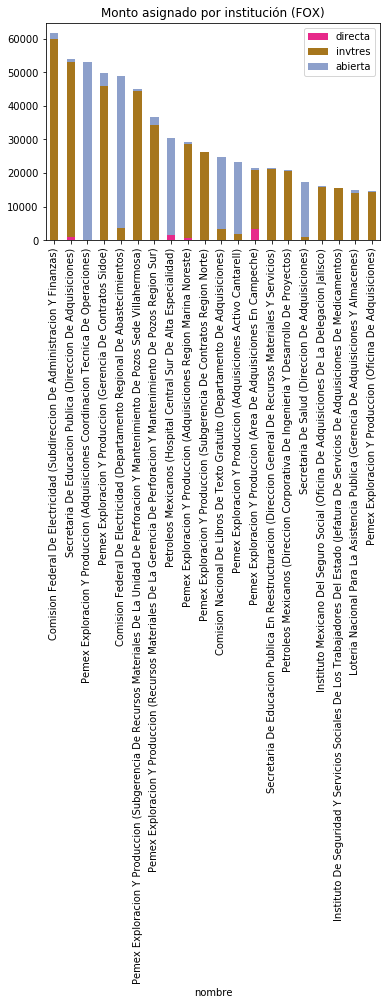

CAL


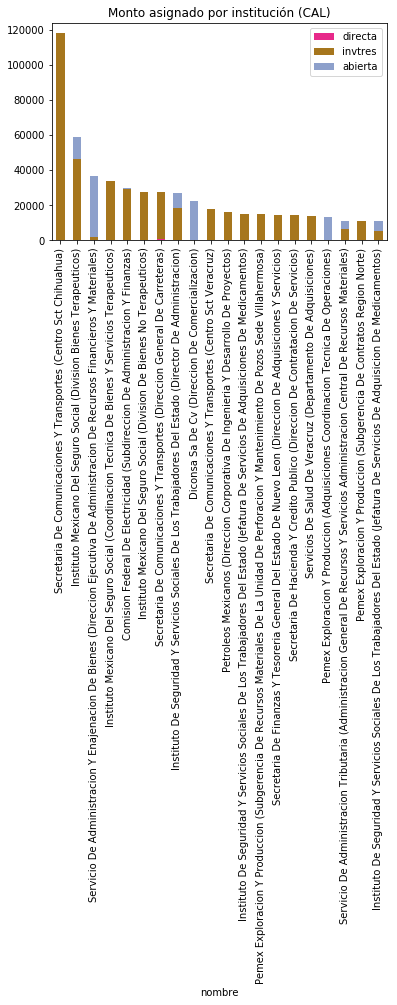

EPN


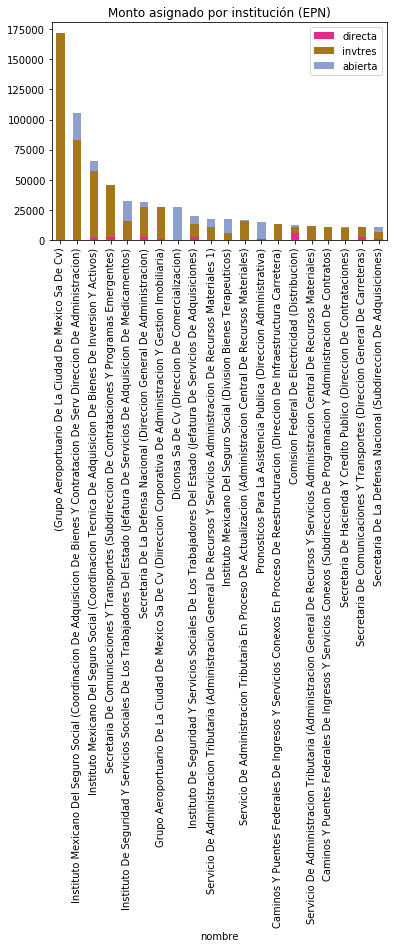

In [56]:
for key, df in inst.items():
    print(key)
    df.sort_values('monto', ascending=False).drop('monto',axis=1).head(20)\
           .plot.bar(stacked=True, color=['#e7298a','#a6761d','#8da0cb'],
                     title="Monto asignado por institución ({})".format(key))
    plt.show()

## ¿Cuántas empresas contrata cada institucion?

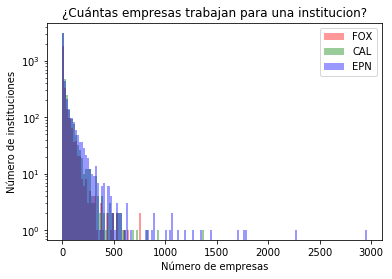

In [48]:
for key, df in inst.items():
    d = data[key]['red'].groupby('nombre').agg( {'empresa':'count', 'c_num':'sum' }) \
                         .rename(columns={'nombre':key}) \
                         .sort_values('c_num', ascending=False)
    d = d['empresa'].to_list()
    sns.distplot(d, kde=False, 
                 bins=round(max(d)/20),
                 label=key, color=colors_sex[key])
plt.title("¿Cuántas empresas trabajan para una institucion?")
plt.xlabel("Número de empresas")
plt.ylabel("Número de instituciones")
plt.yscale('log')
plt.legend()
plt.show()